In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/k_/ksvdlm8j31xfmslmhkz4xcj00000gq/T/ipykernel_65923/2754016217.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [70]:
tr_df = pd.read_csv('data/transactions.csv', on_bad_lines='skip', sep=';')
print(tr_df.shape)
tr_df.head()

/Users/uditg/anaconda3/envs/ocean/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (14,15,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(995975, 23)


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,570400.000,174.800,174.800,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.000,0.000,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,530000.000,174.800,174.800,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.000,0.000,NaN,DAMAC HILLS (2) - ZINNIA
2,14-563-2022,02/06/2022 15:42,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,Residential,500000.000,1188.420,1188.420,NaN,NaN,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0.000,0.000,NaN,NaN
3,11-12317-2022,02/06/2022 15:22,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,Commercial,1500000.000,600.510,600.510,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,NaN
4,11-12316-2022,02/06/2022 15:07,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,Residential,815000.000,112.240,112.240,NaN,NaN,NaN,NaN,Dubai Cycling Course,1.000,1.000,NaN,DAMAC HILLS (2) - AMARGO


In [71]:
#Fill missing values
for c in tr_df.columns:
    if tr_df[c].dtype == 'object':
        tr_df[c].fillna('None', inplace=True)
    else:
        tr_df[c].fillna(0, inplace=True)

## Date parse

In [72]:
tr_df.loc[:, 'Transaction Date'] = tr_df['Transaction Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))

In [73]:
def get_day_of_week(datetime_obj):
    weekday_mapping = {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"
    }
    return weekday_mapping[datetime_obj.weekday()]

In [74]:
tr_df.loc[:, 'Transaction Year'] = tr_df['Transaction Date'].apply(lambda x: x.year)
tr_df.loc[:, 'Transaction Month'] = tr_df['Transaction Date'].apply(lambda x: x.month)
tr_df.loc[:, 'Transaction WeekDay'] = tr_df['Transaction Date'].apply(lambda x: get_day_of_week(x))

In [8]:
tr_df.loc[:, 'Transaction WeekDay'].value_counts()

Wednesday    201553
Monday       199530
Tuesday      197163
Thursday     192077
Sunday       182431
Saturday     14164 
Friday       9057  
Name: Transaction WeekDay, dtype: int64

In [9]:
tr_df.loc[:, 'Transaction Year'].describe()

count   995975.000
mean    2014.556  
std     4.815     
min     1995.000  
25%     2011.000  
50%     2015.000  
75%     2019.000  
max     2022.000  
Name: Transaction Year, dtype: float64

## EDA

In [75]:
tr_df = tr_df.loc[lambda x: x['Transaction Year'] >= 2007]
tr_df = tr_df.loc[lambda x: x['Property Size (sq.m)']>=5].copy()

In [76]:
tr_df.loc[:, 'Amount_per_sqm'] = tr_df['Amount']/tr_df['Property Size (sq.m)']

In [181]:
tr_df.groupby('Usage')['Room(s)'].value_counts(dropna=False)

Usage        Room(s)    
Commercial   NaN            71871 
Residential  1 B/R          243243
             2 B/R          175300
             NaN            133494
             Studio         128218
             3 B/R          100651
             Office         59614 
             4 B/R          29421 
             Shop           13873 
             5 B/R          3771  
             PENTHOUSE      1778  
             Single Room    800   
             6 B/R          587   
             Store Room     323   
             Hotel          31    
             7 B/R          27    
             GYM            25    
             8 B/R          4     
Name: Room(s), dtype: int64

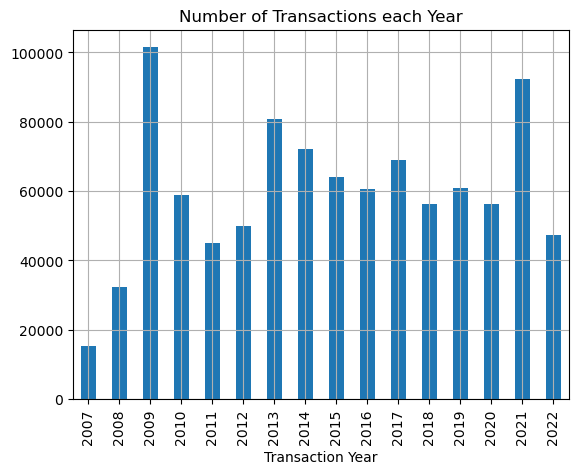

In [50]:
tr_df.groupby('Transaction Year')['Transaction Number'].count().plot.bar()
plt.title('Number of Transactions each Year')
plt.grid()

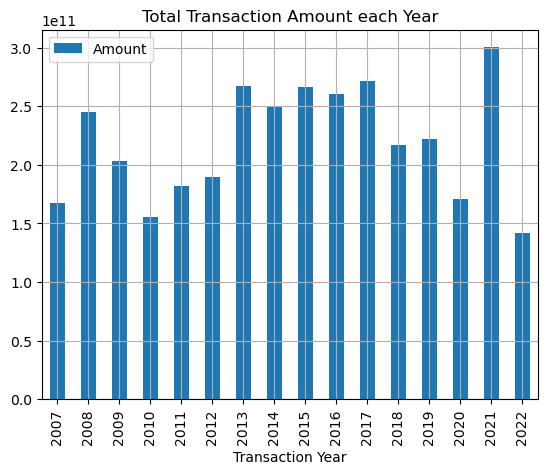

In [51]:
tr_df.groupby('Transaction Year').agg({'Amount': 'sum'}).plot.bar()
plt.title('Total Transaction Amount each Year')
plt.grid()

Text(0.5, 1.0, 'Percentage of Sales by Usage')

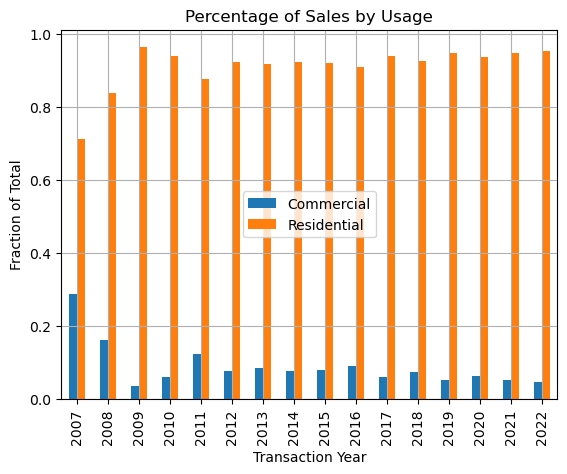

In [90]:
tr_df.groupby(['Transaction Year'])['Usage'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.grid()
plt.ylabel('Fraction of Total')
plt.legend(loc='center')
plt.title('Percentage of Sales by Usage')

In [91]:
tr_df_rooms = tr_df.groupby('Room(s)').filter(lambda x: len(x) >10000)
tr_df_rooms.shape

(955683, 27)

Text(0.5, 1.0, 'Residential Property Sub Types')

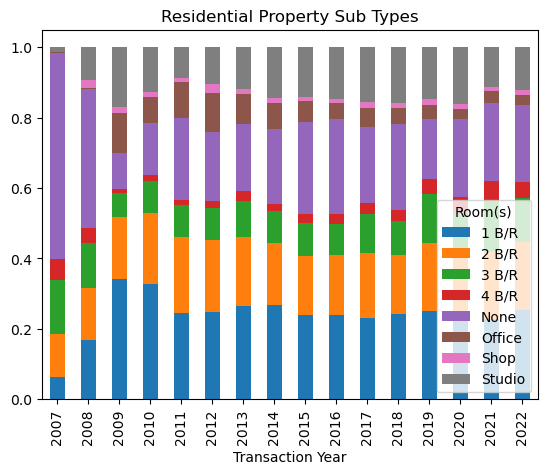

In [13]:
tr_df_rooms.groupby('Transaction Year')['Room(s)'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Residential Property Sub Types')

Text(0.5, 1.0, 'Number of Transactions for 4 B/R Units')

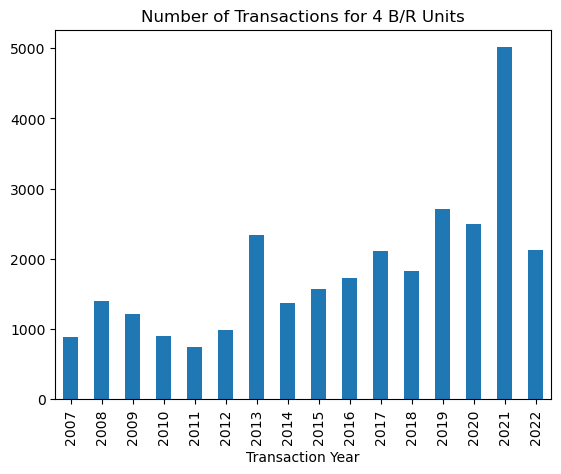

In [14]:
tr_df_rooms.loc[lambda x: x['Room(s)'] == '4 B/R'].groupby('Transaction Year').size().plot.bar()
plt.title('Number of Transactions for 4 B/R Units')

Text(0.5, 1.0, 'Total Amount Transacted for 4 B/R Units')

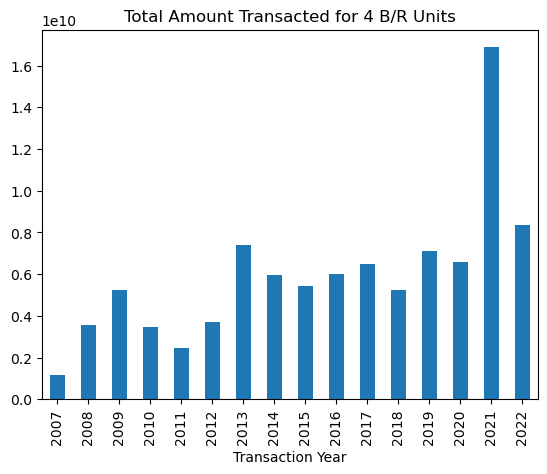

In [15]:
tr_df_rooms.loc[lambda x: x['Room(s)'] == '4 B/R'].groupby('Transaction Year').agg({'Amount': 'sum'}).plot.bar(legend=None)
plt.title('Total Amount Transacted for 4 B/R Units')

(0.0, 10000000.0)

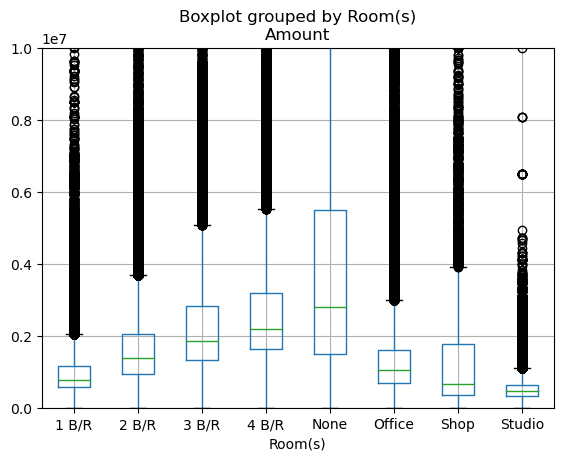

In [17]:
tr_df_rooms.boxplot(by='Room(s)', column = 'Amount')
plt.ylim(0, 10**7)

In [282]:
tr_df_temp = tr_df.copy()
tr_df_temp.loc[:, 'is_near_landmark'] = tr_df_temp['Nearest Landmark'].apply(lambda x: 1 if isinstance(x, str) else 0)
tr_df_temp.loc[:, 'is_near_landmark'].value_counts()

1    995975
Name: is_near_landmark, dtype: int64

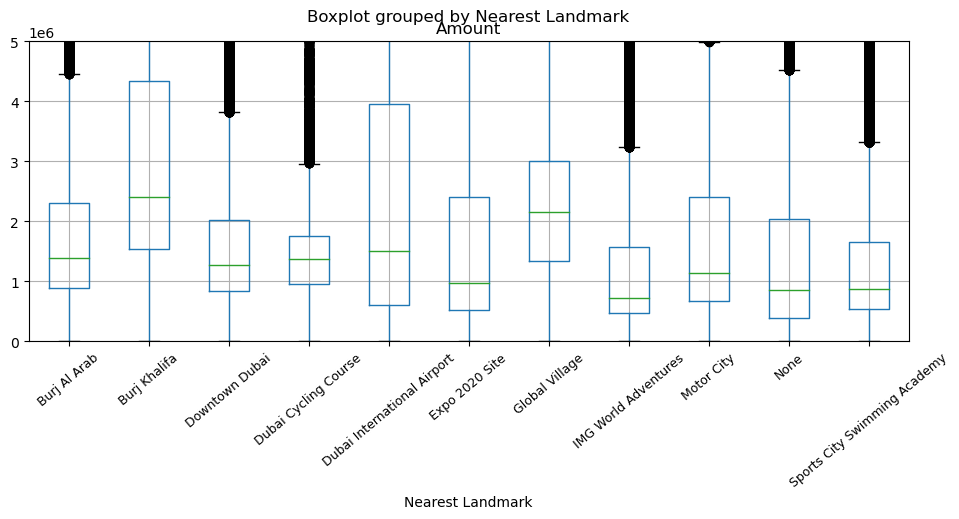

In [315]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Nearest Landmark').filter(lambda x: len(x)>5000)
tr_df_temp.boxplot(by='Nearest Landmark', column='Amount', ax=ax)
plt.ylim(0, 0.5*(10**7))
plt.xticks(rotation=40, fontsize=9);

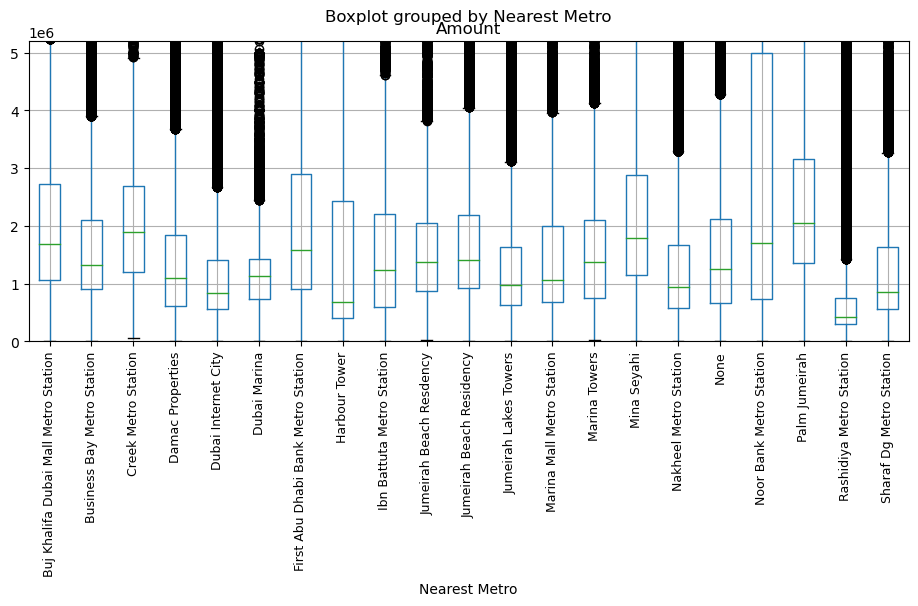

In [306]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Nearest Metro').filter(lambda x: len(x)>10000)
tr_df_temp.boxplot(by='Nearest Metro', column='Amount', ax=ax)
plt.ylim(0, 0.52*(10**7))
plt.xticks(rotation=90, fontsize=9);

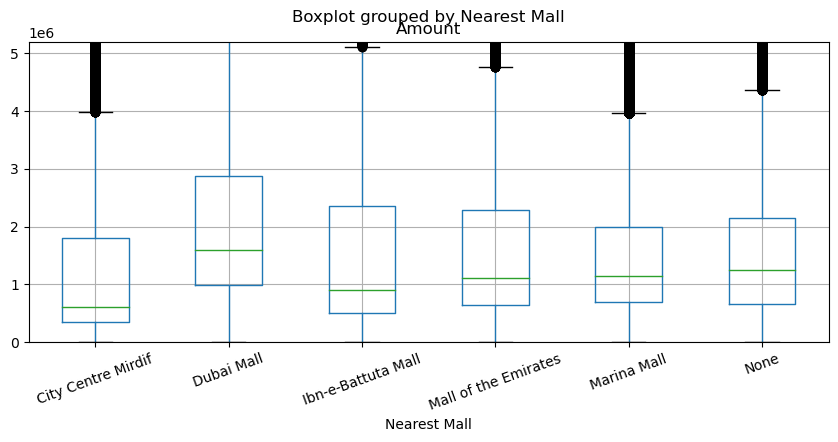

In [312]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
tr_df_temp = tr_df.groupby('Nearest Mall').filter(lambda x: len(x)>1000)
tr_df_temp.boxplot(by='Nearest Mall', column='Amount', ax=ax)
plt.ylim(0, 0.52*(10**7))
plt.xticks(rotation=20);

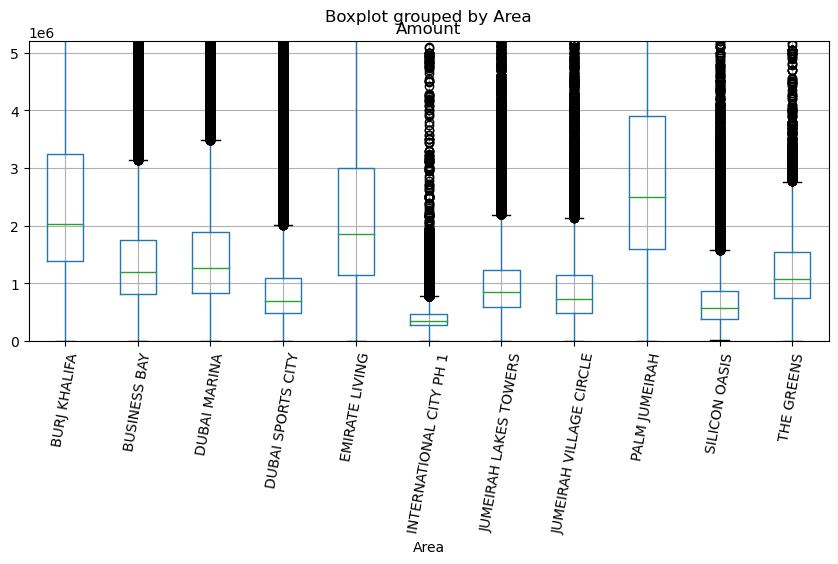

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
tr_df_temp = tr_df.groupby('Area').filter(lambda x: len(x)>20000)
tr_df_temp.boxplot(by='Area', column='Amount', ax=ax)
plt.ylim(0, 0.52*(10**7))
plt.xticks(rotation=80);

In [109]:
tr_df.sort_values(by='Amount_per_sqm').tail()

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project,Transaction Year,Transaction Month,Transaction Day,Transaction WeekDay,Amount_per_sqm
897579,102-42199-2008,2009-04-05 21:48:00,20248926,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BARSHA HEIGHTS,Unit,Office,216526724.000,NaN,100.350,Office,P4-240,Dubai Internet City,Mall of the Emirates,Burj Al Arab,2.000,1.000,NaN,I - RISE TOWER,2009,4,5,Sunday,2157715.237
789635,102-16053-2007,2010-04-21 17:24:00,14435823,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI MARINA,Unit,Flat,659741940.000,NaN,298.340,4 B/R,B1-51,Mina Seyahi,Marina Mall,Burj Al Arab,1.000,1.000,NaN,ELITE RESIDENCE,2010,4,21,Wednesday,2211376.081
510298,43-17-2014,2014-12-17 08:15:00,922215,Mortgage,Portfolio Mortgage Registration,Ready,Free Hold,Residential,Al Kheeran,Unit,Flat,750000000.000,160.000,319.320,3 B/R,G-15,Emirates Metro Station,City Centre Mirdif,Dubai International Airport,0.000,0.000,NaN,NaN,2014,12,17,Wednesday,2348741.075
96227,13-8284-2021,2021-07-01 11:40:00,53241177,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,Wadi Al Safa 3,Unit,Flat,849600000.000,168.280,168.280,3 B/R,NaN,NaN,NaN,NaN,0.000,0.000,NaN,LIVING LEGENDS PHASE 7,2021,7,1,Thursday,5048728.310
774868,13-3589-2010,2010-07-07 07:57:00,615612,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,BURJ KHALIFA,Unit,Flat,3013326074.000,138.150,138.150,2 B/R,P-006,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,0.000,0.000,NaN,BURJ VIEWS,2010,7,7,Wednesday,21811987.506


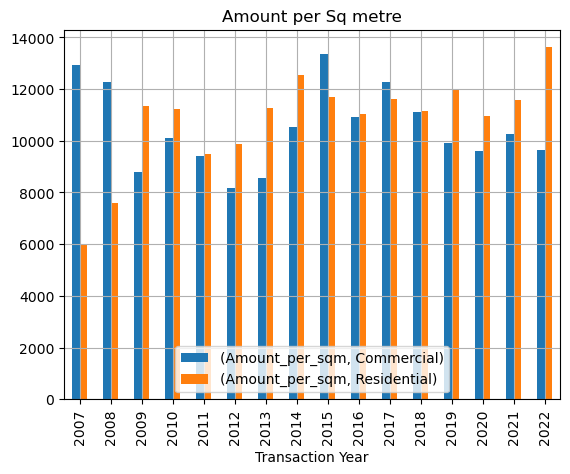

In [81]:
tr_df.groupby(['Transaction Year', 'Usage']).agg({'Amount_per_sqm': np.mean}).unstack().plot.bar(stacked=False)
plt.title('Amount per Sq metre')
plt.grid()
plt.legend(loc='lower center');

## Correlation analysis

In [22]:
tr_df_non_gift = tr_df.loc[lambda x: x['Transaction Type']!='Gifts']
tr_df_non_gift['Transaction Type'].value_counts()

Sales       688972
Mortgage    245269
Name: Transaction Type, dtype: int64

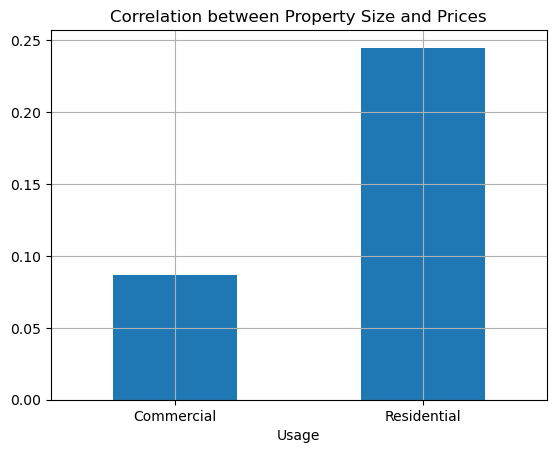

In [45]:
tr_df_non_gift.groupby('Usage').apply(lambda df: np.corrcoef(df['Property Size (sq.m)'],
                                                            df['Amount'])[0, 1]).plot.bar()
plt.xticks(rotation=0)
plt.title('Correlation between Property Size and Prices')
plt.grid()

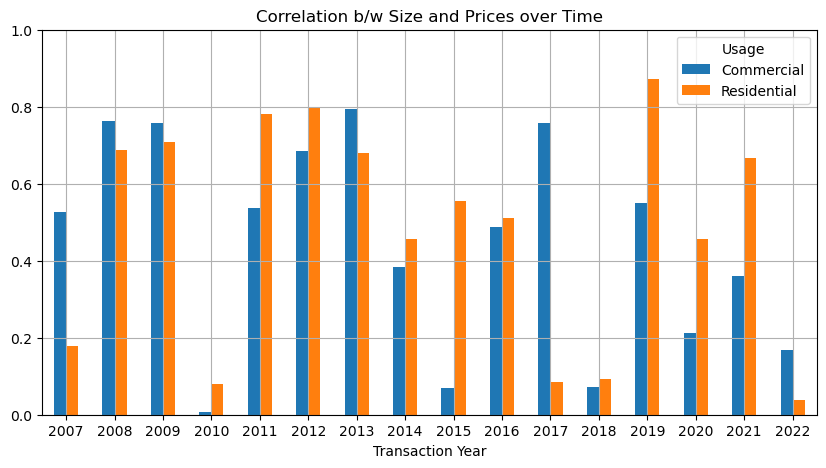

In [41]:
tr_df_non_gift.groupby(['Transaction Year', 'Usage']).apply(lambda df: np.corrcoef(df['Property Size (sq.m)'],
                                                            df['Amount'])[0, 1]).unstack().plot(kind='bar', figsize=(10,5))
plt.ylim(0,1)
plt.grid()
plt.title('Correlation b/w Size and Prices over Time')
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Usage Type of Properties')

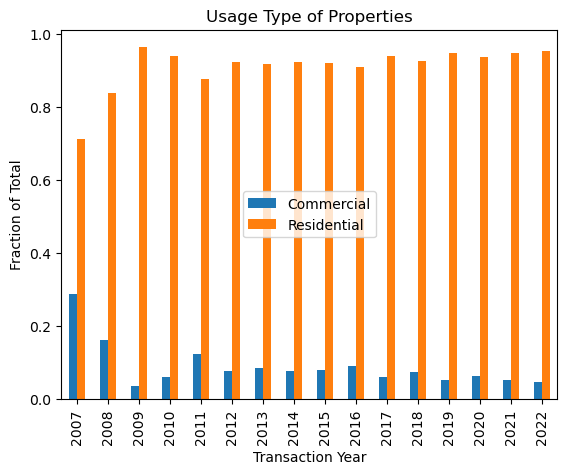

In [160]:
tr_df.groupby('Transaction Year')['Usage'].value_counts(normalize=True).unstack().plot.bar()
plt.legend(loc='center')
plt.ylabel('Fraction of Total')
plt.title('Usage Type of Properties')

Text(0.5, 1.0, 'Amount Transacted by Usage Type')

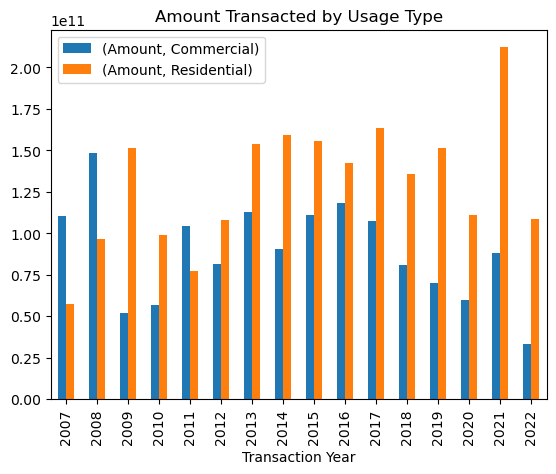

In [162]:
tr_df.groupby(['Transaction Year', 'Usage']).agg({'Amount': 'sum'}).unstack().plot.bar()
plt.legend()
plt.title('Amount Transacted by Usage Type')

Text(0, 0.5, 'Fraction of Total')

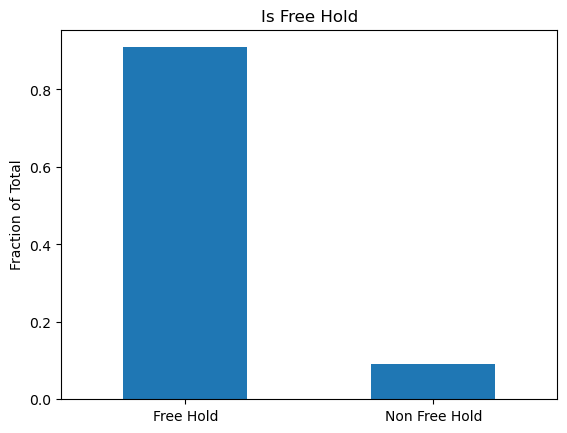

In [172]:
tr_df.loc[:, 'Is Free Hold?'].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.title('Is Free Hold')
plt.ylabel('Fraction of Total')